In [1]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\Acer\Desktop\alfido internship\titanic\tested.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(418, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
#checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#calculating the % of null values present within the data frame
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [14]:
#dropping the columns with % of null values > 40%
df.drop(["Cabin"],axis=1,inplace=True)

In [16]:
df.shape
#hence dopped column name "Cabin"

(418, 11)

In [17]:
#dealing with missing values
df.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [22]:
meanage=df.Age.mean()
print("Average age=",meanage)
roundedaavgage=round(meanage,0)
print("rounded avg age=",roundedaavgage)

Average age= 30.272590361445783
rounded avg age= 30.0


In [25]:
#filling the missing Age with rounded avg 
df.Age=df.Age.fillna(roundedaavgage)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

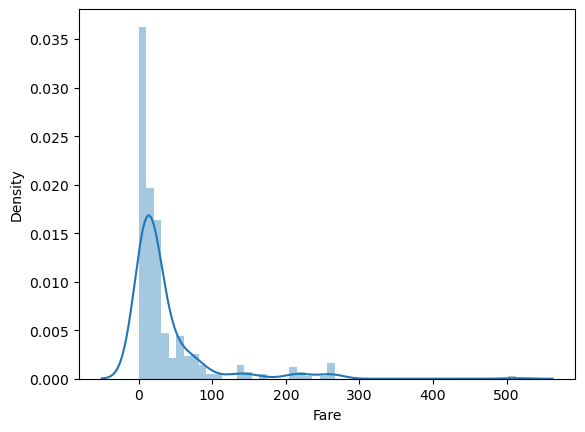

In [31]:
# to handle the 1 mssing value in Fare column
sns.distplot(df.Fare)


In [34]:
#since the graph is right skew, we can fit with mean value
rounded_Fare=round(df.Fare.mean(),0)
rounded_Fare

36.0

In [36]:
df.Fare=df.Fare.fillna(rounded_Fare)


In [38]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [48]:
#handling outliers
nums_col=df.select_dtypes(include=["number"]).columns.tolist()

In [49]:
nums_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [50]:
categorical_col=df.select_dtypes(["object"]).columns.tolist()
categorical_col

['Name', 'Sex', 'Ticket', 'Embarked']

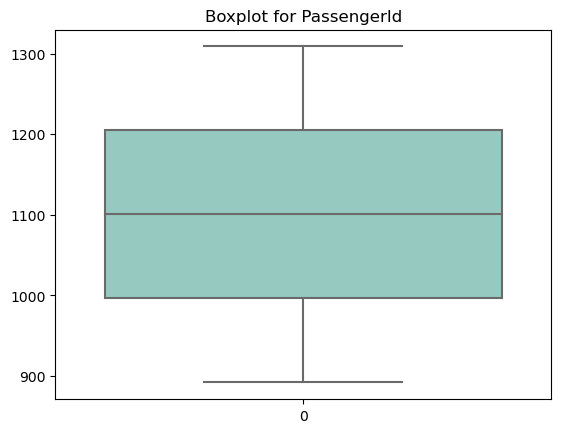

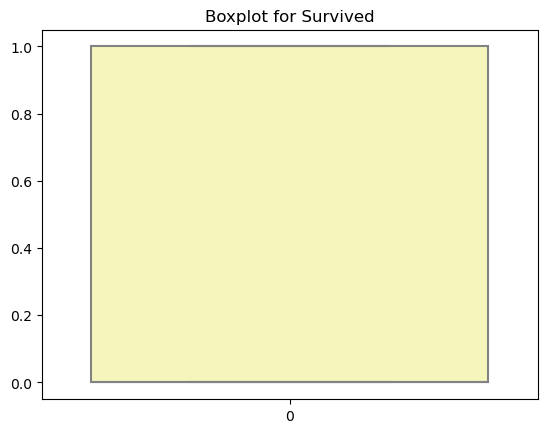

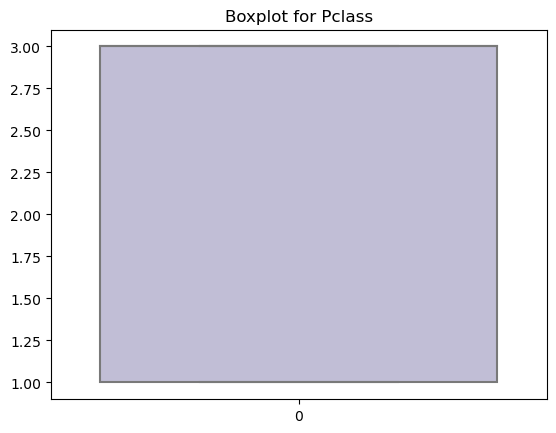

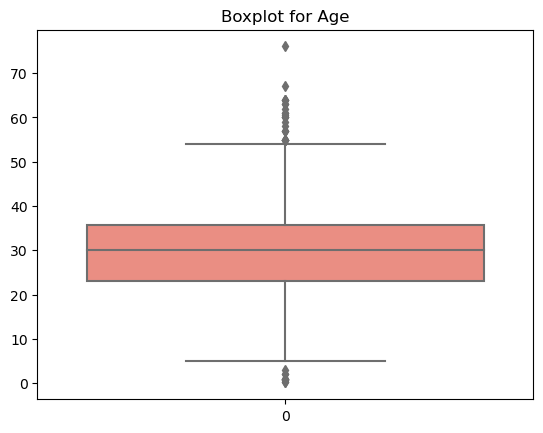

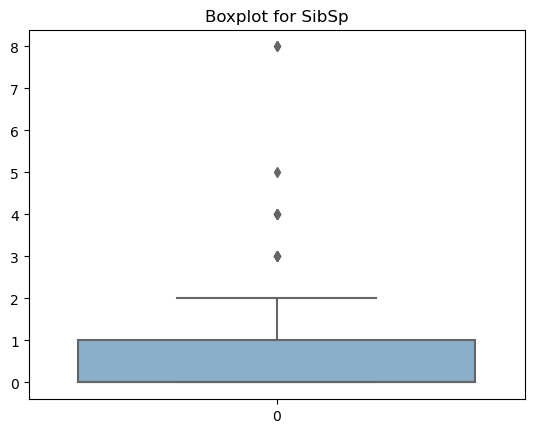

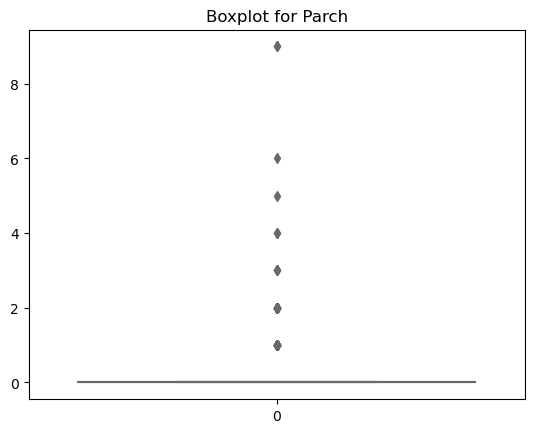

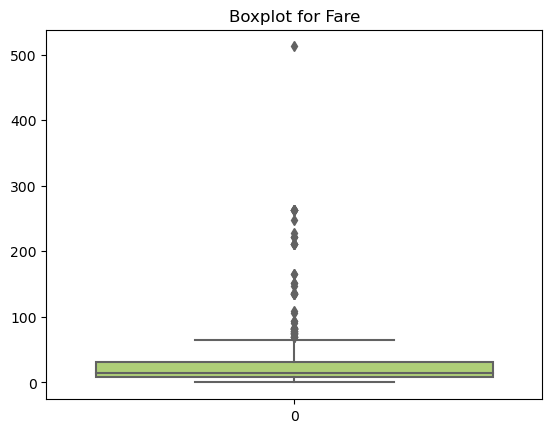

In [58]:
#checking the outlies for numerical columns
nums_col = df.select_dtypes(include=["number"]).columns.tolist()

# Define a list of colors
colors = sns.color_palette("Set3", n_colors=len(nums_col))

# Iterate through numeric columns and plot boxplots with different colors
for i, col in enumerate(nums_col):
    sns.boxplot(df[col], color=colors[i])
    plt.title("Boxplot for " + col)
    plt.show()


In [59]:
#outliers in SiBSp column
df.SibSp.value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [60]:
#outlier for Parch column
df.Parch.value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [62]:
#Data Imbalance for Survied Column
df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [63]:
print(df.Survived.value_counts()/len(df.Survived)*100)

0    63.636364
1    36.363636
Name: Survived, dtype: float64


TypeError: 'str' object is not callable

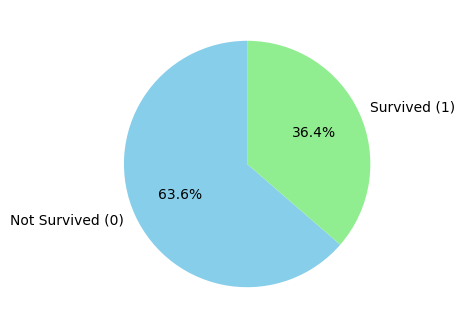

In [108]:
survived=df.Survived.value_counts(normalize=True)
# Plotting
survived_counts = df['Survived'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
plt.pie(survived_counts, labels=['Not Survived (0)', 'Survived (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Survived Variable Distribution')

# Show the plot
plt.show()

In [67]:
df.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

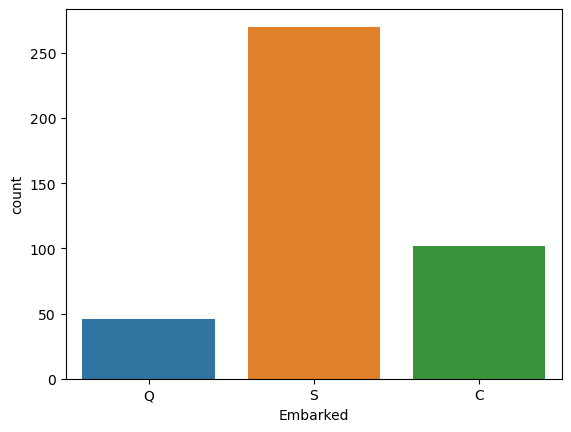

In [68]:
sns.countplot(x=df.Embarked)
plt.title=("Embarked")
plt.show()

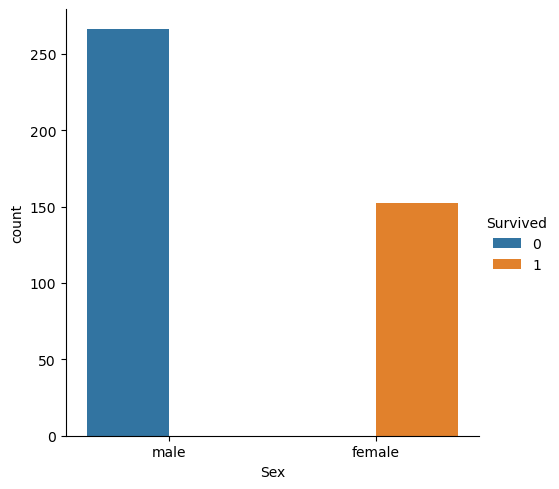

In [69]:
#Bivariant Analysis for Categorical Data
#plot for the survied people with taking sex wise survey
df.groupby(["Sex","Survived"])["Survived"].count()
sns.catplot(x="Sex",hue="Survived",kind="count",data=df)
plt.show()

In [70]:
#group by sex
df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

In [72]:
survived_people=df[df["Survived"]==1]
survived_people.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S


In [75]:
#creating categories for age column
df["age_group"]=pd.cut(df.Age[:5],[0,20,40,60,80],labels=["<20","20-40","40-60","60-80"])


In [76]:
df.age_group.value_counts(normalize=True)

20-40    0.6
40-60    0.2
60-80    0.2
<20      0.0
Name: age_group, dtype: float64

In [77]:
df.Age.head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

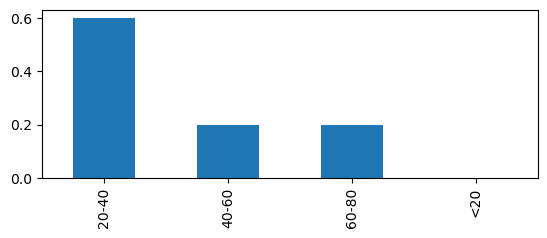

In [79]:
#plotting graph for age column
plt.subplot(2,1,2)
df.age_group.value_counts(normalize=True).plot.bar()
plt.show()

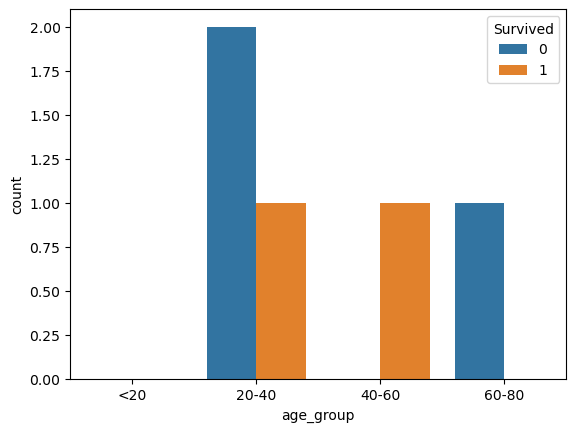

In [80]:
#countplot for age group
sns.countplot(df,x="age_group",hue="Survived")
plt.show()

In [81]:
#correlation chart for dataframe df
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.030935,0.003818,0.043080,0.008202
Survived,-0.023245,1.000000,-0.108615,0.000662,0.099943,0.159120,0.191370
Pclass,-0.026751,-0.108615,1.000000,-0.443234,0.001087,0.018721,-0.576605
Age,-0.030935,0.000662,-0.443234,1.000000,-0.078870,-0.044980,0.328468
SibSp,0.003818,0.099943,0.001087,-0.078870,1.000000,0.306895,0.171480
Parch,0.043080,0.159120,0.018721,-0.044980,0.306895,1.000000,0.229995
Fare,0.008202,0.191370,-0.576605,0.328468,0.171480,0.229995,1.000000


In [86]:
#heatmap for corelation matrix plot beteween variables

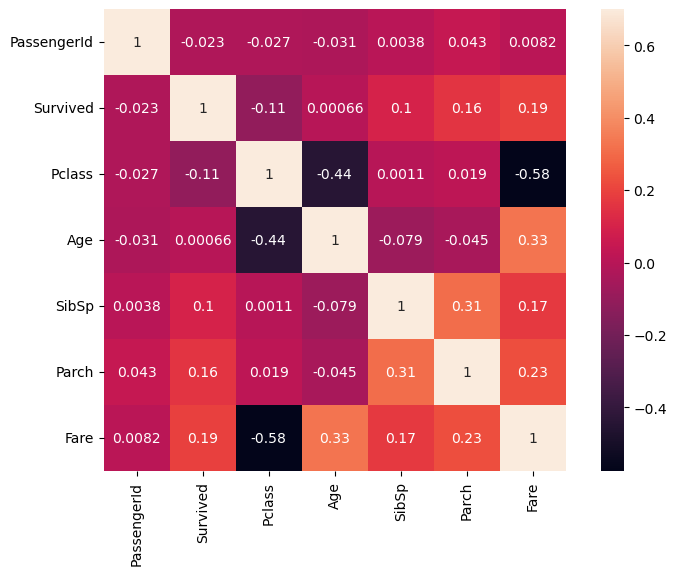

In [87]:
corr=df.corr()
fig=plt.figure(figsize=(9,6))
sns.heatmap(corr,vmax=0.7,square=True,annot=True)
plt.show()

TypeError: 'str' object is not callable

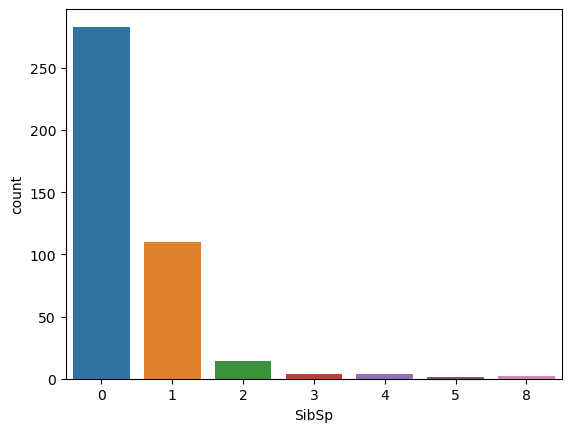

In [109]:
#count plot for SibSp column
sns.countplot(x="SibSp", data=df)
plt.title("SibSp")
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    int64   
 2   Pclass       418 non-null    int64   
 3   Name         418 non-null    object  
 4   Sex          418 non-null    object  
 5   Age          418 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    object  
 11  age_group    5 non-null      category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 36.7+ KB


In [94]:
 df['Sex'].replace(['female','male'], [0,1], inplace=True)

In [95]:
# Display the first 5 rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,20-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,40-60
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,60-80
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,20-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,20-40


In [96]:
# Replace the initials from the Embarked column by 0, 1,2 
df['Embarked'].replace(['S','C', 'Q'], [0, 1, 2], inplace=True)

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2,20-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,40-60
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2,60-80
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,20-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,20-40


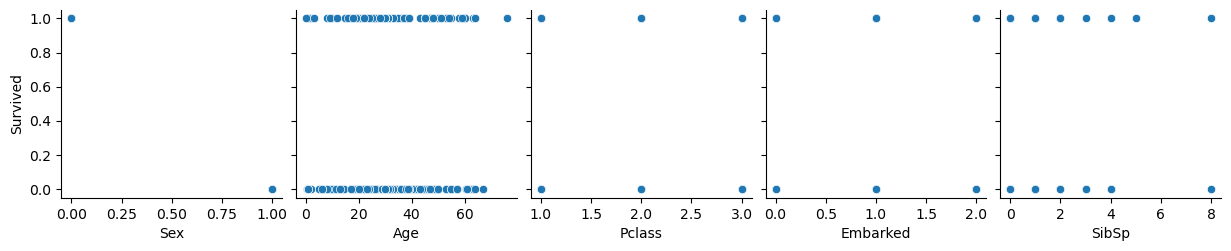

In [98]:
# visualise the data with scatter plot
sns.pairplot(data=df,
            x_vars=['Sex', 'Age', 'Pclass', 'Embarked', 'SibSp'],
            y_vars='Survived')
plt.show()

In [99]:
# Create X and y
X = df[['Sex', 'Pclass', 'Embarked', 'SibSp']].values
y = df[['Survived']].values

In [101]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
test_score = round(logreg.score(X_test, y_test) * 100, 2)
test_score

100.0

In [104]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

100.0

Titanic Survival Prediction dataset underwent a thorough Exploratory Data Analysis (EDA), 
revealing key insights and paving the way for predictive modeling. During the analysis, 
outliers were identified in the SibSp and Parch columns. Additionally, the dataset was 
scrutinized for data imbalances, uncovering a notable gender-based disparity, with 63.64% of
males not surviving compared to 36.36% of females who did survive the disaster, indicating 
an inherent imbalance in the data.

The exploration of the dataset involved employing various visualization techniques, 
including pie charts, bar plots, and countplots. Bivariate analysis was conducted, 
focusing on categorical data such as sex and survival rates. Age buckets were introduced
to gain a nuanced understanding of age-related patterns. Further, a heatmap was generated, 
revealing highly negative correlations for some variables and weak positive correlations, 
such as between Survived and Fare, and Age and Fare columns.

Moving to predictive modeling, Logistic Regressio
n and Decision Trees algorithms were employed. The process involved:

Creating the predictive variable (X) and the target variable (y).
Establishing training and test sets, utilizing ratios such as 70-30 or 80-20 to ensure effectiv
e model evaluation.
Training the model on the training set to learn the coefficients and patterns within the data.
Evaluating the model's performance across multiple facets, encompassing the t
raining set, the test set, and potentially employing additional metrics for 
a comprehensive assessment.
This comprehensive approach not only addressed data exploration but also laid
the groundwork for deploying predictive algorithms to discern patterns and make informed predictions
regarding the likelihood of survival in the Titanic dataset.